# Results discussion

In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Directory containing the model log CSV files
model_logs_directory = "model_outputs_data"

training_log_files = {
    "AlexNet": "model_evaluation_logs/training_logs_alexnet.csv",
    "ResNet50": "model_evaluation_logs/training_resnet50_logs.csv",
    "InceptionV1": "model_evaluation_logs/training_google_inception_v1_net_logs.csv",
    "InceptionV3": "model_evaluation_logs/training_google_inception_v3_net_logs.csv",
    "DenseNet121": "model_evaluation_logs/training_logs_densenet121.csv",
    "EfficientNet": "model_evaluation_logs/training_logs_efficientnet.csv"
}

prediction_log_files = {
    "AlexNet": "model_prediction_logs/alexnet_labels_predictions.csv",
    "ResNet50": "model_prediction_logs/resnet50_labels_predictions.csv",
    "InceptionV1": "model_prediction_logs/inception_v1_labels_predictions.csv",
    "InceptionV3": "model_prediction_logs/inception_v3_labels_predictions.csv",
    "DenseNet121": "model_prediction_logs/densenet121_labels_predictions.csv",
    "EfficientNet": "model_prediction_logs/efficientnet_labels_predictions.csv"
}

## Plot validation loss

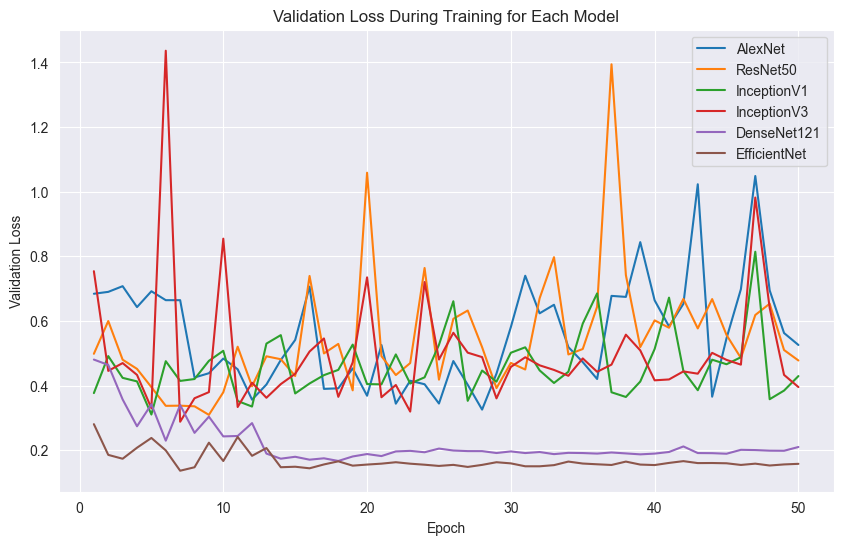

In [8]:
plt.figure(figsize=(10, 6))

# Loop over each log file to plot validation loss
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load the CSV data
        log_data = pd.read_csv(file_path)
        
        # Plot validation loss
        plt.plot(log_data["Epoch"], log_data["Validation_Loss"], label=model_name)

# Customize the plot
plt.title("Validation Loss During Training for Each Model")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)

plt.show()

## Plot training accuracy

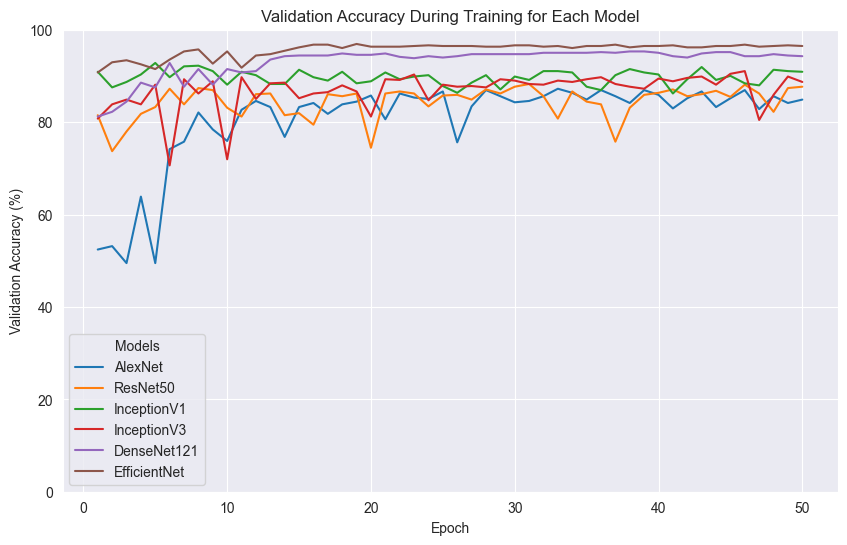

In [21]:
plt.figure(figsize=(10, 6))

# Loop over each log file to plot validation accuracy
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load the CSV data
        log_data = pd.read_csv(file_path)
        
        # Plot validation accuracy if available
        if "Validation_Accuracy" in log_data.columns:
            plt.plot(log_data["Epoch"], log_data["Validation_Accuracy"], label=model_name)

# Customize the plot
plt.title("Validation Accuracy During Training for Each Model")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy (%)")
plt.legend(title="Models")
plt.grid(True)
plt.ylim(0, 100) 

plt.show()

## Model performance comparison table
- Total time spent was not logged in a file. It was taken directly from the Jupternotebook terminal output
- The max training accuracy for each model was considered as the training accuracy here

In [11]:
# Initialize an empty dictionary to store training accuracy
training_accuracy = {}

# Iterate through each model's log file to extract maximum training accuracy
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        log_data = pd.read_csv(file_path)
        # Extract the maximum training accuracy
        if "Validation_Accuracy" in log_data.columns:
            max_accuracy = log_data["Validation_Accuracy"].max()
            training_accuracy[model_name] = max_accuracy
        else:
            training_accuracy[model_name] = None  # Handle missing data
    else:
        training_accuracy[model_name] = None  # Handle missing files

# Data: Replace placeholder values with actual results
model_arr = ["AlexNet", "ResNet50", "InceptionV1", "InceptionV3", "DenseNet121", "EfficientNet"]
data = {
    "Model": model_arr,
    "Total Parameters (Millions)": [x / 1e6 for x in [57012034, 23512130, 5601954, 25116362, 7978856, 4010110]],
    "Training Time (seconds)": [2154.25, 4635.63, 3642.16, 5151.95, 2273.48, 1597.75],
    "GFLOPS": [0.71, 4.13, 1.51, 2.85, 3.79, 0.53],
    "Training Accuracy (%)": [training_accuracy.get(model, "N/A") for model in model_arr]
}

# Convert to DataFrame for visualization or report
df = pd.DataFrame(data)

# Save or print the updated DataFrame
df.to_csv("model_outputs_data/model_comparison_summary.csv", index=False)
print(df)

          Model  Total Parameters (Millions)  Training Time (seconds)  GFLOPS  \
0       AlexNet                    57.012034                  2154.25    0.71   
1      ResNet50                    23.512130                  4635.63    4.13   
2   InceptionV1                     5.601954                  3642.16    1.51   
3   InceptionV3                    25.116362                  5151.95    2.85   
4   DenseNet121                     7.978856                  2273.48    3.79   
5  EfficientNet                     4.010110                  1597.75    0.53   

   Training Accuracy (%)  
0              87.224670  
1              88.252570  
2              92.804699  
3              91.042584  
4              95.301028  
5              96.916300  


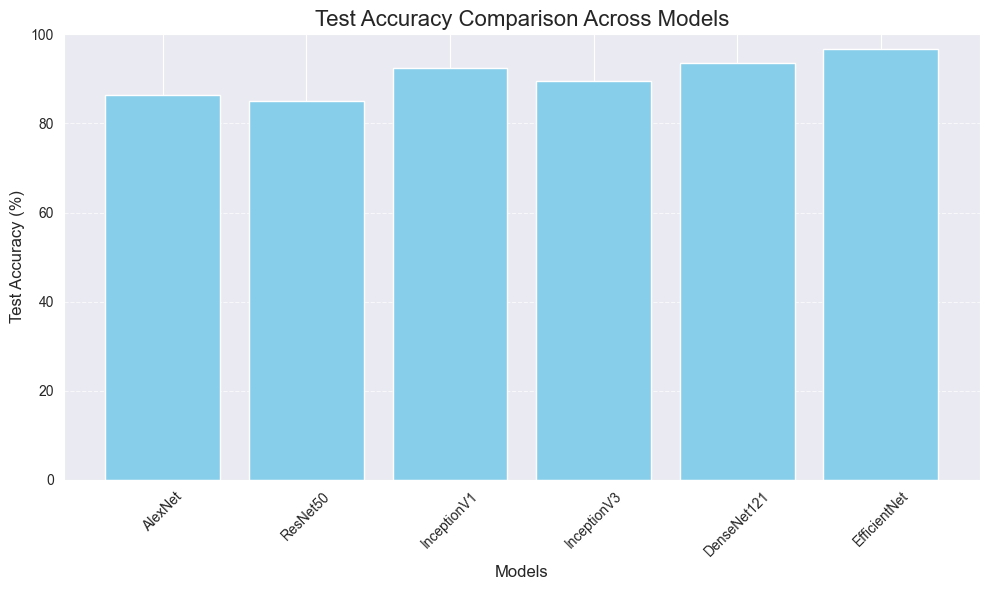

In [12]:
# Dictionary to store test accuracy for each model
test_accuracy = {}

# Iterate through each model's prediction log file
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load predictions
        data = pd.read_csv(file_path)
        true_labels = data["true_labels"]
        predicted_labels = data["predicted_labels"]

        # Calculate test accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        test_accuracy[model_name] = accuracy * 100  # Convert to percentage

# Plot test accuracy comparison
plt.figure(figsize=(10, 6))
models = list(test_accuracy.keys())
accuracies = list(test_accuracy.values())

plt.bar(models, accuracies, color='skyblue')
plt.title("Test Accuracy Comparison Across Models", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.ylim(0, 100)  # Ensure y-axis goes from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


## Print all confusion matrix in one plot

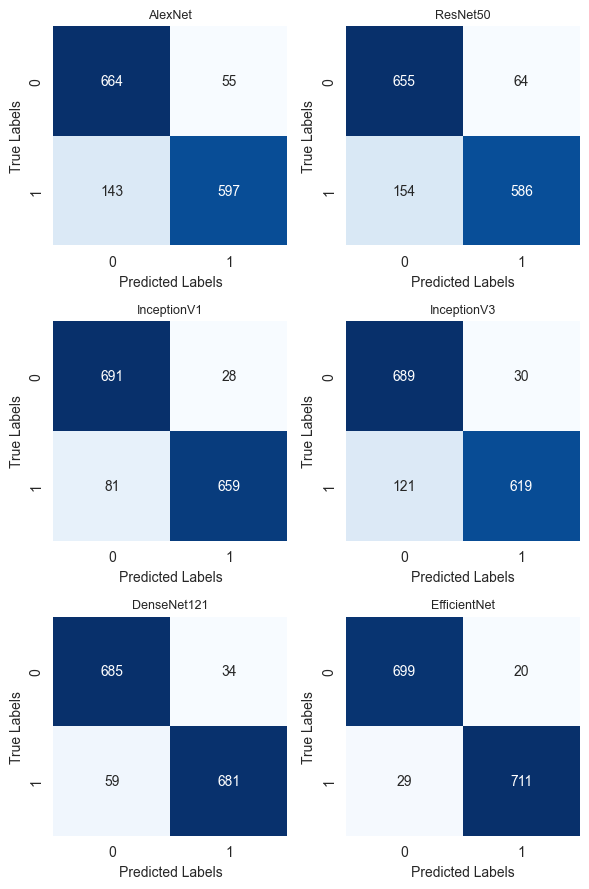

In [13]:
confusion_matrices = {}

# Calculate confusion matrices for each model
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load predictions
        data = pd.read_csv(file_path)
        if "true_labels" in data.columns and "predicted_labels" in data.columns:
            true_labels = data["true_labels"]
            predicted_labels = data["predicted_labels"]

            # Compute confusion matrix
            cm = confusion_matrix(true_labels, predicted_labels)
            confusion_matrices[model_name] = cm

fig, axes = plt.subplots(3, 2, figsize=(6, 9))
axes = axes.flatten()  # Flatten to handle all axes uniformly

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}", fontsize=9)
    axes[idx].set_xlabel("Predicted Labels")
    axes[idx].set_ylabel("True Labels")

# Hide any unused subplots
for idx in range(len(confusion_matrices), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.show()
